# P08: Plotting and Matplotlib

## Graphs and visualization

Data analysis starts with looking at data, and ends with communicating your results. Both of these are done most effectively with graphs.

There are many skills associated with making graphs and visualizations:

0. figuring out *what* to plot to answer a question.

1. transforming data to expose the variables you want to plot

2. choosing the right kind of plot for the data / question.

3. instructing a computer to make the plot you want.

4. making the plot interpretable, and appealing

## Choosing plots

What are you looking for, or trying to show?

- the distribution of one variable.  -> histogram

- the distribution of two variables: how two variables relate to one another  -> scatter

- how one variable changes as a function of a categorical other variable -> barplot

- how one variable changes as a function of another numerical variable -> line plot


## data

* Gapminder: dataset describing life expentency depending on factors like life expectancy, GDP, Region, etc.
* [link](https://github.com/UCSD-CSS-001/ucsd-css-001.github.io)

Standard plots:

- histogram -> (density plot)  `hist`

- scatter -> (bubble)  `scatter`

- line chart -> (+ error bars)  `plot`

- bar chart -> (+ error bars) `bar`

- labeling axes.  `xlabel` and `ylabel`

## Our data

[gapminder](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : '16'}

plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', linewidth = 2)

In [3]:
gm = pd.read_csv('gapminder.csv')
gm.head()

,Unnamed: 0,country,continent,year,lifeExp,pop,gdpPercap
0,1,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,2,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,3,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,4,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,5,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
# drop 'Unnamed: 0'
gm = pd.read_csv('gapminder.csv').drop(columns = 'Unnamed: 0')
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Plot population for each continent for a specific year (2007)

In [9]:
# grab the names of the continents
c_names = gm['continent'].unique()
print(c_names)

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']


In [40]:
continents = []
for c in c_names:
    m = gm[(gm['year'] == 2007) & (gm['continent'] == c)]['pop'].mean()
    continents.append(m)
    
continents

[115513752.33333333,
 19536617.633333333,
 17875763.307692308,
 35954847.36,
 12274973.5]

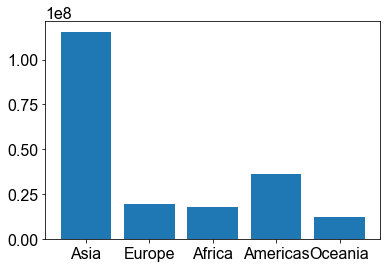

In [58]:
# plot! x-values (continent names), y-values (mean pop)
plt.bar(c_names, continents)
plt.show()

### Horizontal bar plots...

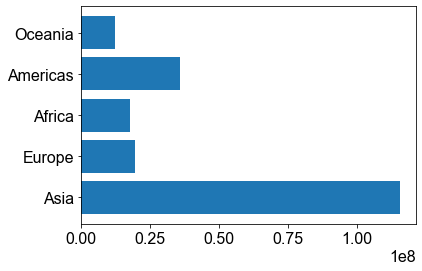

In [59]:
plt.barh(c_names, continents)
plt.show()

### Bar chart

How does life expectancy differ by continent?

{numerical variable} ~ {categorical}  -> bar plot 

category on the x axis, number on the y axis, and we get 1 number per category.

Mean life expectancy, in 2007, by continent

* Introduce color, edgecolor, fontsize

In [46]:
age = []
for c in c_names:
    m = gm[(gm['year'] == 2007) & (gm['continent'] == c)]['lifeExp'].mean()
    age.append(m)
    
age

[70.72848484848484, 77.64859999999999, 54.80603846153845, 73.60812, 80.7195]

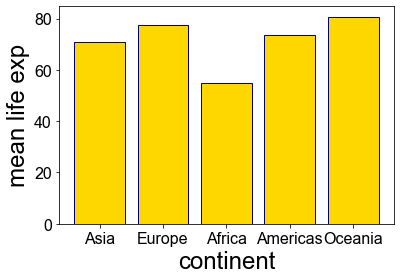

In [60]:
## make a bar plot
plt.bar(c_names, age,
           color = 'gold',
           edgecolor = 'navy')

## label stuff!
plt.xlabel('continent', fontsize = 24)
plt.ylabel('mean life exp', fontsize = 24)

plt.show()

In [51]:
plt.bar?

## Conventions

> Learn the rules like a pro, so you can break them like an artist. 
> 
> -- *Pablo Picasso*

### Histogram

Show the *distribution* of a single variable, which values are more or less common?

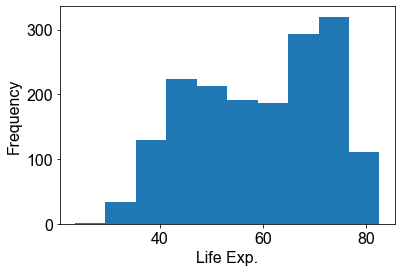

In [62]:
plt.hist(gm['lifeExp'])
plt.xlabel('Life Exp.')
plt.ylabel('Frequency')
plt.show()

### Make our hist look a little nicer...change num bins, color, alpha (transparency), legend, etc. 

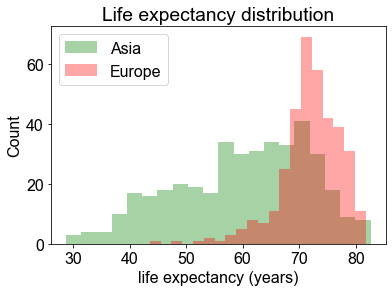

In [73]:
plt.hist(gm[ gm['continent'] == 'Asia' ]['lifeExp'], 
             bins=20, 
             color='green', alpha = .35)

# what happens if you put plt.show() here???
# plt.show()

plt.hist(gm[ gm['continent'] == 'Europe' ]['lifeExp'], 
             bins=20, 
             color='red', alpha = .35)

# or can specify a range...
# plt.hist(gm['lifeExp'], 
#              bins=range(20, 90, 5), 
#              color='navy')

plt.xlabel('life expectancy (years)')
plt.ylabel('Count')
plt.title('Life expectancy distribution')
plt.legend(['Asia', 'Europe'])

plt.show()

## Line plot

* How has average life expectancy changed from 1952 to 2007?

* x = number, y = number, use line plot...

* Mean life expectancy, by year.

In [75]:
## group by year
## calculate mean life expectancy per group

year_summary = (gm
    .groupby('year')                            # group based on common year labels
    .agg(life_expectancy = ('lifeExp', 'mean')) # aggregate lifeExp, compute mean
    .reset_index())  # reset index to default...

# have a look...
year_summary

,year,life_expectancy
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,1967,55.678290
4,1972,57.647386
5,1977,59.570157
6,1982,61.533197
7,1987,63.212613
8,1992,64.160338
9,1997,65.014676


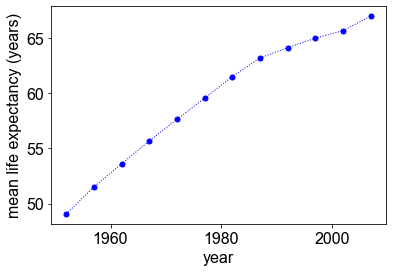

In [80]:
## make a line plot
plt.plot(year_summary['year'], 
             year_summary['life_expectancy'],
            'bo-',            # blue, circle markers, solid line...
            markersize = 5,   # size of circle markers...
            linewidth = 1)

## label stuff!
plt.xlabel('year')
plt.ylabel('mean life expectancy (years)')

plt.show()

## Scatter plot

How does the *distribution* of life expectancies across African countries vary by year?

distribution of two number -> scatterplot

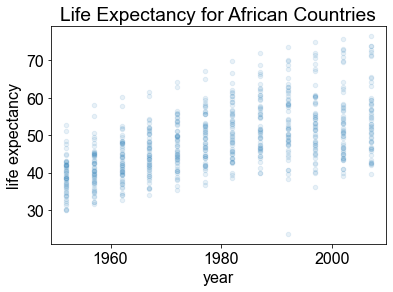

In [85]:
import numpy as np

## filter out African countries
africa = gm[ gm['continent'] == 'Africa' ]

## plot scatter plot of lifeExp ~ year

# alpha like
plt.scatter(africa['year'], 
            africa['lifeExp'],
            alpha = 0.1,
            s=20)

# plt.scatter(africa['year'] + np.random.random(len(africa))*2-1, 
#             africa['lifeExp'],
#             s=1)

plt.xlabel('year')
plt.ylabel('life expectancy')
plt.title('Life Expectancy for African Countries')

plt.show()

## Varying color and size

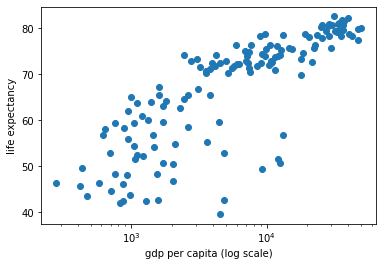

In [216]:
year_2007 = gm[ gm['year']==2007 ]
plt.scatter(year_2007['gdpPercap'], year_2007['lifeExp'])
plt.xscale('log')
plt.xlabel('gdp per capita (log scale)')
plt.ylabel('life expectancy')

plt.show()

### Same thing, but color code by continent and size by population

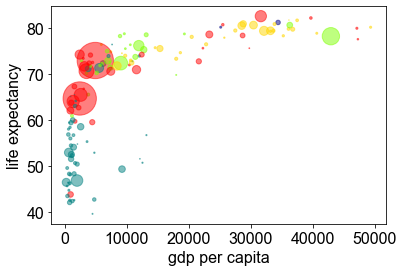

In [93]:
year_2007 = gm[ gm['year']==2007 ]

colors = {'Asia': 'red',
          'Europe' : 'gold',
           'Americas' : 'chartreuse',
           'Africa' : 'teal',
            'Oceania' : 'navy'}

plt.scatter(year_2007['gdpPercap'], 
                year_2007['lifeExp'],
                s = year_2007['pop']/1e6,
                c = year_2007['continent'].map(colors),
                alpha = 0.5)

# plt.xscale('log')
plt.xlabel('gdp per capita')
plt.ylabel('life expectancy')
plt.show()

# color code by continent
# sale size by population

### Conventions

**Distribution of Number** -> histogram, with number on x, counts on y

**Distribution of Category** -> histogram, with category on x, counts on y

**Number as a function of Category** -> bar chart, category on x, mean number on y

**Number as a function of Number** -> scatter plot (y~x) or line plot (mean(y) ~ x)

**Number as a function of Number + Category** -> scatter plot or line plot with color varying by category.

**Number as a function of Number + Number** -> if it doesnt matter much: bubble chart.  If it matters a lot, considering binning into categories.

